In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets, linear_model
from sklearn import cross_validation, svm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
train = scipy.io.loadmat('ReducedImagesForTraining.mat')['images'].T
test = scipy.io.loadmat('ReducedImagesForTesting.mat')['images'].T
print train.shape

def pca(X, wsp):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #rint "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    k = 1; 
    suma = np.sum(D)
    while(np.sum(D[-k:])/suma < wsp):
        k = k+1
    return Y_new[:,-k:], D[-k:], V[:,-k:], k


def PCA(X, k):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #print "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    #print Y_new
    return Y_new[:,-k:], D[-k:], V[:,-k:]

(250, 4920)


In [9]:
from scipy import misc
from IPython.display import Image
from IPython.display import display
def pokaz(i):
    zdj1 = train[i,:]
    plt.figure(figsize=(10,4))
    plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')


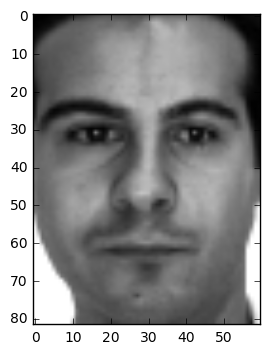

In [10]:
pokaz(0)

In [22]:
train_new, D, V, k = pca(train, 0.95)

In [23]:
print k

88


In [26]:
def odtworz(Y, D, V , X_std, X_mean):
    D_new = np.matrix(np.sqrt(D)).reshape(Y.shape[1],1)
    Y_new = np.multiply(D_new,Y.T).T
    Y_new = np.dot(Y_new, V.T)
    Z = np.multiply(X_std,Y_new) + X_mean
    return Z

blad sredniokwadratowy: 104952896.367


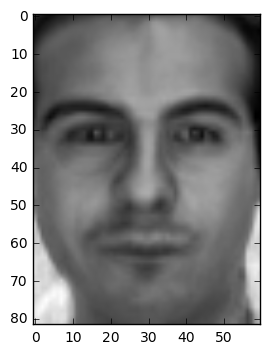

In [30]:
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')

blad sredniokwadratowy: 1.14409631005e-19


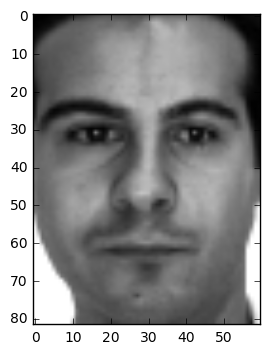

In [31]:
train_new, D, V = PCA(train, 2000)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')


blad sredniokwadratowy: 1.1683823673e-19


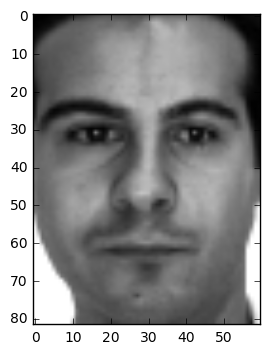

In [32]:
train_new, D, V = PCA(train, 1000)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')

blad sredniokwadratowy: 204965193.867


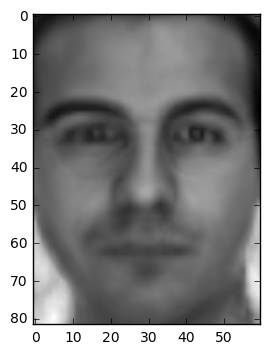

In [33]:
train_new, D, V = PCA(train, 50)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')

blad sredniokwadratowy: 418059062.1


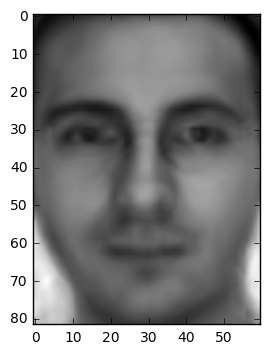

In [34]:
train_new, D, V = PCA(train, 20)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')

blad sredniokwadratowy: 628090431.254


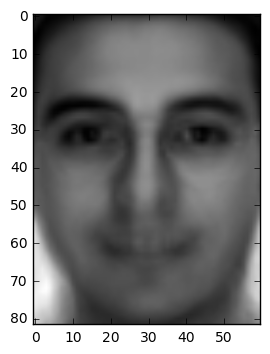

In [35]:
train_new, D, V = PCA(train, 10)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')

blad sredniokwadratowy: 884961190.926


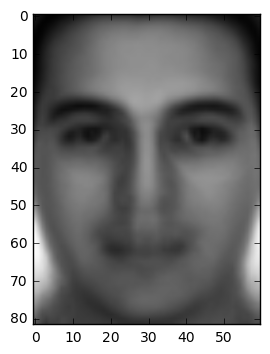

In [36]:
train_new, D, V = PCA(train, 5)
train_odtw = odtworz(train_new, D, V, np.std(train,axis=0), np.mean(train,axis=0))
diff = train - train_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))
zdj1 = train_odtw[0,:]
plt.figure(figsize=(10,4))
plt.imshow(zdj1.reshape(60,82).T, cmap = 'gray')